In [1]:
import cv2 as cv
import numpy as np

In [2]:
path = "test.jpg"

In [3]:
# from PIL import Image
from PIL import Image
# PIL.Image.MAX_IMAGE_PIXELS = 933120000
Image.MAX_IMAGE_PIXELS = 933120000

In [4]:
path1 = "test_1.jpg"

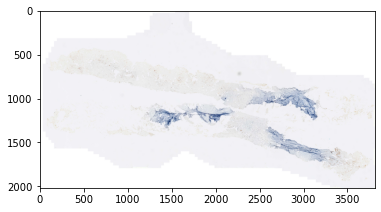

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(path)
imgplot = plt.imshow(img)
plt.show()

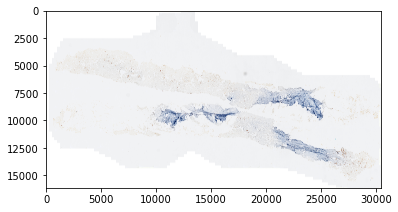

In [6]:
img = mpimg.imread(path1)
# img = cv.imread(path1)
imgplot = plt.imshow(img)
plt.show()

In [7]:
img.shape

(16128, 30464, 3)

In [8]:
height = img.shape[0]
width = img.shape[1]
height, width

(16128, 30464)

In [9]:
def calculate_HeightWidthFactor(dim):
    factMax = dim/2
    factList = []
    dimList=[]
    fact = 2
    split_lowerBoundary = 5
    split_upperBoundary = 10
    while(fact<=factMax):
        if((factMax%fact)==0):
            factList.append(fact)
            if(((dim/fact)>=split_lowerBoundary) and ((dim/fact)<=split_upperBoundary)):
                dimList.append(fact)
                dimList.append(dim/fact)
                return dimList
        fact+=1

In [10]:
splitImgDimList = []
splitImgDir = "D:/Project/AI_Med/splitImg/"
heightFact = calculate_HeightWidthFactor(height)
widthFact = calculate_HeightWidthFactor(width)
totalImg = heightFact[1]*widthFact[1]
heightFact, widthFact

([2016, 8.0], [3808, 8.0])

In [ ]:
totalImg

In [ ]:
def plotImg(imgDim):
    imgplot = plt.imshow(imgDim)
    plt.show()

In [ ]:
def imgWrite(imgName, img_cropped):
    cv.imwrite(imgName, cv.cvtColor(img_cropped, cv.COLOR_RGB2BGR))

In [ ]:
def drawHotSpot(w1,h1,w2,h2):
    start_point = (w1,h1) 
    imgName = "Hotspot.jpg"
    image = cv.imread(path1)
    end_point = (w2,h2) 

    # Black color in BGR 
    color = (0, 0, 0) 
    print("Start point {} End Point {}".format(start_point, end_point))
    # Line thickness of 10 px 
    thickness = 10

    # Using cv2.rectangle() method 
    # Draw a rectangle with blue line borders of thickness of 2 px 
    image = cv.rectangle(image, (w1,h1), (w2, h2), color, thickness)
    cv.imwrite(imgName, image)

In [ ]:
def splitImg(plot):
    global splitImgDimList
    if(len(splitImgDimList)>0):
        splitImgDimList = []
    imgCnt = 1
    h1 = 0
    h2 = heightFact[0]
    w1 = 0
    w2 = widthFact[0]
    hInc = 1
    wInc = 1
    while(hInc<=int(heightFact[1])):
        while(wInc<=int(widthFact[1])):
            img_cropped = img[h1:h2, w1:w2, :]
            imgName = splitImgDir+str(imgCnt)+".jpg"
            imgWrite(imgName, img_cropped)
            tempDim = [h1,h2,w1,w2]
            splitImgDimList.append(tempDim)
            w1 = w2
            w2 = w1+widthFact[0]
            if(imgCnt ==plot):
                print(imgCnt)
#                 imgWrite(imgName, img_cropped)
#                 print("Start point {} End Point {}".format((splitImgDimList[plot-1][2],splitImgDimList[plot-1][0]), (splitImgDimList[plot-1][3],splitImgDimList[plot-1][1])))
                drawHotSpot(splitImgDimList[plot-1][2],splitImgDimList[plot-1][0], splitImgDimList[plot-1][3],splitImgDimList[plot-1][1])
            imgCnt+=1
            wInc+=1

        wInc = 1
        h1 = h2
        h2 = h1+heightFact[0]
        w1 = 0
        w2 = widthFact[0]
        hInc+=1

In [ ]:
splitImg(56)

In [ ]:
len(splitImgDimList)

In [ ]:
splitImgDimList